# MAGIC + LST combined analysys: stereo parameter reconstruction

In [1]:
import yaml
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import magicctapipe
from IPython.display import Image
print(f'magicctapipe version: {magicctapipe.__version__}')

magicctapipe version: 0.3.0


In [2]:
# --- display all columns --- 
pd.set_option('display.max_columns', None)

# --- customize plt figure ---
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 15
plt.rcParams['grid.linestyle'] = ':'

# --- get the default color cycle ---
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

The script for the stereo parameter reconstruction is <b>lst1_magic_stereo_reco.py<b>
    
This script processes DL1 events and reconstructs the geometrical stereo parameters with more than one telescope information. The quality cutsspecified in the configuration file are applied to the events before thereconstruction.When the input is real data containing LST-1 and MAGIC events, it checksthe angular distances of their pointing directions and excludes theevents taken with larger distances than the limit specified in theconfiguration file. This is in principle to avoid the reconstruction ofthe events taken in too-mispointing situations. For example, DL1 data may contain the coincident events taken with different wobble offsets between the systems. If the `--magic-only` argument is given, it reconstructs the stereoparameters using only MAGIC events.

<img src="Stereo_tech.png" alt="Alternative text" />
    
<b>USAGE<b>:

python lst1_magic_stereo_reco.py
    
--input-file dl1_LST-1_MAGIC.Run03265.0040.h5
    
(--output-dir dl1_stereo)
    
(--config-file config.yaml)
    
(--magic-only)

# 1) Input data

if you work at the IT container:

In [3]:
#school_data_dir='/fefs/aswg/workspace/2023_joint_analysis_school'

if you work at pic

In [4]:
#school_data_dir='pnfs/pic.es/data/magic/Users/SWschool2023/data/2023_joint_analysis_school'

Locally:

In [5]:
school_data_dir='/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school'

In [6]:
date='20210213'

In [7]:
dl1_coincidence_dir=f'{school_data_dir}/stereo_reconstruction/input/DL1_coinc'

In [8]:
input_file = f'{dl1_coincidence_dir}/{date}/dl1_LST-1_MAGIC.Run03636.0039.h5'

# 2) Config file

In [9]:
config_file = './config_MAGIC_LST.yaml'

with open(config_file, 'rb') as f:
    config = yaml.safe_load(f)

In [10]:
config['stereo_reco']

{'quality_cuts': '(intensity > 50) & (width > 0)', 'theta_uplim': '6 arcmin'}

'theta_uplim':

    it's an upper limit on the pointing angular distance between the telescopes (6 arcmin=0.1 deg)

# 3) Running the script

In [11]:
output_dir=f'{school_data_dir}/stereo_reconstruction/output'
# If you are working at the IT container or at pic, create your own directory
#output_dir = './stereo/output'
#!mkdir -p $output_dir

Execute script from terminal:

In [12]:
!lst1_magic_stereo_reco\
--input-file $input_file\
--output-dir $output_dir\
--config-file $config_file


Input file: /home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_coinc/20210213/dl1_LST-1_MAGIC.Run03636.0039.h5

Is simulation: False

Telescope positions:
    1: <Quantity  -8.09 77.13  0.78  m>
    2: <Quantity   39.3  -62.55  -0.97  m>
    3: <Quantity  -31.21 -14.57   0.2   m> 

MAGIC-only analysis: False

Quality cuts: (intensity > 50) & (width > 0)

In total 2254 stereo events are found:
    M1_M2 (type 0): 374 events (16.6%)
    LST1_M1 (type 1): 137 events (6.1%)
    LST1_M2 (type 2): 327 events (14.5%)
    LST1_M1_M2 (type 3): 1416 events (62.8%) 

Checking the angular distances of the LST-1 and MAGIC pointing directions...
--> All the events were taken with smaller angular distances than the limit 6.0 arcmin.

Reconstructing the stereo parameters...
0 events
100 events
200 events
300 events
400 events
500 events
600 events
700 events
800 events
900 events
1000 events
1100 events
1200 events
1300 events
1400 events
1500 events
1

Import function on a notebook:

In [13]:
from magicctapipe.scripts.lst1_magic import lst1_magic_stereo_reco

In [14]:
#lst1_magic_stereo_reco.stereo_reconstruction(input_file, output_dir, config)

# 4) Check the output data

In [15]:
output_file=f'{output_dir}/dl1_stereo_LST-1_MAGIC.Run03636.0039.h5'

In [16]:
data = pd.read_hdf(output_file, key='events/parameters')
data.set_index(['obs_id', 'event_id', 'tel_id'], inplace=True)
data.sort_index(inplace=True)

In [17]:
data

obs_id_magic  event_id_magic  obs_id_lst  \
obs_id  event_id tel_id                                             
3636    2067037  1            5094488          145607      3636.0   
                 2            5094488          145607      3636.0   
                 3            5094488          145607      3636.0   
        2067064  1            5094488          145608      3636.0   
                 2            5094488          145608      3636.0   
...                               ...             ...         ...   
5094488 148921   3            5094488          148921         NaN   
        148925   2            5094488          148925         NaN   
                 3            5094488          148925         NaN   
        148945   2            5094488          148945         NaN   
                 3            5094488          148945         NaN   

                         event_id_lst   intensity         x         y  \
obs_id  event_id tel_id                                                 
3636    2067037  1          2067037.0  568.281787  0.618554  0.318950   
                 2          2067037.0  107.148438  0.009816 -0.022747   
                 3          2067037.0   83.875000  0.068853  0.182024   
        2067064  1          2067064.0  232.257523  0.400098  0.574464   
                 2          2067064.0   59.546875  0.121371  0.071267   
...                               ...         ...       ...       ...   
5094488 148921   3                NaN  230.570312  0.304160  0.218077   
        148925   2                NaN   50.258594  0.149695 -0.252761   
                 3                NaN   89.390625  0.215800 -0.172823   
        148945   2                NaN  149.674316  0.263716 -0.013910   
                 3                NaN  142.335938 -0.016180  0.098809   

                                r        phi    length  length_uncertainty  \
obs_id  event_id tel_id                                                      
3636    2067037  1       0.695944  27.277322  0.169247            0.006161   
                 2       0.024775 -66.658194  0.046909            0.001911   
                 3       0.194611  69.280175  0.025175            0.002130   
        2067064  1       0.700062  55.143835  0.033250            0.002323   
                 2       0.140748  30.420617  0.023691            0.001945   
...                           ...        ...       ...                 ...   
5094488 148921   3       0.374260  35.639783  0.058813            0.001713   
        148925   2       0.293763 -59.364418  0.022256            0.001752   
                 3       0.276473 -38.689467  0.026613            0.001674   
        148945   2       0.264082  -3.019282  0.025705            0.001412   
                 3       0.100125  99.299818  0.274489            0.004059   

                            width  width_uncertainty        psi  skewness  \
obs_id  event_id tel_id                                                     
3636    2067037  1       0.060760           0.003905  36.404510 -0.581237   
                 2       0.021984           0.001299  23.094616 -0.513190   
                 3       0.016298           0.001103 -81.881885  0.811305   
        2067064  1       0.031969           0.002718  46.856274  0.375004   
                 2       0.012446           0.001199   0.134580  0.164114   
...                           ...                ...        ...       ...   
5094488 148921   3       0.026510           0.001045 -59.023847 -0.554657   
        148925   2       0.014678           0.001020 -77.997527  0.086623   
                 3       0.017282           0.001238 -12.790864  0.719319   
        148945   2       0.021552           0.001177 -88.871482 -0.446785   
                 3       0.020412           0.001025  44.035621  0.272009   

                         kurtosis      slope  intercept  intensity_width_1  \
obs_id  event_id tel_id                                                      
3636

# 5) Merge the subrub files

The script for merging hdf file is <b>merge_hdf_files.py<b>


This script merges the HDF files produced by the LST-1 + MAGIC combined analysis pipeline. It parses information from the file names, so they should follow the convention, i.e., *Run*.*.h5 or *run*.h5. If no output directory is specified with the `--output-dir` argument, it saves merged files in the `merged` directory which will be created
under the input directory. If the `--run-wise` argument is given, it merges input files run-wise.
It is applicable only to real data since MC data are already produced run-wise. The `--subrun-wise` argument can be also used to merge MAGIC DL1 real data subrun-wise (for example, dl1_M1.Run05093711.001.h5 + dl1_M2.Run05093711.001.h5 -> dl1_MAGIC.Run05093711.001.h5).

<b>Usage<b>:
python merge_hdf_files.py

--input-dir dl1

(--output-dir dl1_merged)

(--run-wise)

(--subrun-wise)

In [18]:
stereo_subrun_dir=f'{school_data_dir}/stereo_reconstruction/input/DL1_stereo/{date}'
stereo_merged_dir=f'{output_dir}/merged'
!mkdir -p $stereo_merged_dir

# 5.1) Running the script

Execute script from terminal:

In [19]:
!merge_hdf_files\
--input-dir $stereo_subrun_dir\
--output-dir $stereo_merged_dir\
--run-wise


Input directory: /home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213

Merging the input files run-wise...

/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0000.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0001.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0002.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0003.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0004.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_jo

/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0052.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0053.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0054.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0055.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0056.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03634.0057.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_sch

/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03635.0025.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03635.0026.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03635.0027.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03635.0028.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03635.0029.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03635.0030.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_sch

/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0005.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0006.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0007.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0008.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0009.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0010.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_sch

/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0065.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0066.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0067.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0068.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0069.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_school/stereo_reconstruction/input/DL1_stereo/20210213/dl1_stereo_LST-1_MAGIC.Run03636.0070.h5
/home/gpirola/Desktop/SoftwareSchool2023/2023_joint_analysis_sch

Import function on a notebook:

In [20]:
from magicctapipe.scripts.lst1_magic import merge_hdf_files

In [21]:
#merge_hdf_files(input_dir, output_dir)
#without specifying the run_wise flag to be true, it will merge all the subruns in the direcotry togheter

Check the content of the merged file:

In [22]:
stereo_merged_file=f'{stereo_merged_dir}/dl1_stereo_LST-1_MAGIC.Run03636.h5'

In [23]:
data_merged = pd.read_hdf(stereo_merged_file, key='events/parameters')
data_merged.set_index(['obs_id', 'event_id', 'tel_id'], inplace=True)
data_merged.sort_index(inplace=True)

In [24]:
data_merged

obs_id_magic  event_id_magic  obs_id_lst  \
obs_id  event_id tel_id                                             
3636    154479   1            5094488           16377      3636.0   
                 2            5094488           16377      3636.0   
        154497   1            5094488           16386      3636.0   
                 2            5094488           16386      3636.0   
                 3            5094488           16386      3636.0   
...                               ...             ...         ...   
5094488 300466   3            5094488          300466         NaN   
        300494   2            5094488          300494         NaN   
                 3            5094488          300494         NaN   
        300514   2            5094488          300514         NaN   
                 3            5094488          300514         NaN   

                         event_id_lst   intensity         x         y  \
obs_id  event_id tel_id                                                 
3636    154479   1           154479.0   77.082737  0.640690 -0.301914   
                 2           154479.0  234.490625 -0.172064 -0.270049   
        154497   1           154497.0  135.261961  0.587805  0.377949   
                 2           154497.0   61.686198  0.130531 -0.025415   
                 3           154497.0  160.785156  0.316848  0.267515   
...                               ...         ...       ...       ...   
5094488 300466   3                NaN  105.535807 -0.263828  0.058637   
        300494   2                NaN  571.716276  0.194914 -0.129480   
                 3                NaN   52.750000  0.118956 -0.289954   
        300514   2                NaN   67.233594  0.075107 -0.124456   
                 3                NaN  175.148438  0.306899  0.234878   

                                r         phi    length  length_uncertainty  \
obs_id  event_id tel_id                                                       
3636    154479   1       0.708262  -25.231345  0.027894            0.004640   
                 2       0.320207 -122.503645  0.075852            0.002417   
        154497   1       0.698828   32.740385  0.034875            0.004242   
                 2       0.132982  -11.017813  0.025209            0.002064   
                 3       0.414676   40.174405  0.066606            0.002305   
...                           ...         ...       ...                 ...   
5094488 300466   3       0.270265  167.469413  0.044213            0.001738   
        300494   2       0.234001  -33.595837  0.158325            0.003044   
                 3       0.313407  -67.693681  0.026001            0.002094   
        300514   2       0.145363  -58.889771  0.023753            0.002229   
                 3       0.386464   37.427742  0.056867            0.001945   

                            width  width_uncertainty        psi  skewness  \
obs_id  event_id tel_id                                                     
3636    154479   1       0.020898           0.004359  45.079527 -0.493266   
                 2       0.018674           0.000869 -10.463876  0.299771   
        154497   1       0.021430           0.003145 -72.748665 -0.041424   
                 2       0.013723           0.001145  88.951871 -0.846357   
                 3       0.019362           0.001265  10.610484  0.035735   
...                           ...                ...        ...       ...   
5094488 300466   3       0.017560           0.001199  46.420100 -0.108963   
        300494   2       0.044723           0.001032 -25.467410 -0.038956   
                 3       0.013162           0.001540  69.685685  0.574142   
        300514   2       0.012583           0.000859 -86.612795 -0.322850   
                 3       0.016303           0.000860  32.578150 -0.061106   

                         kurtosis     slope  intercept  intensity_width_1  \
obs_id  event_id tel_id                                               

# 5.2) Check the stereo parameter distributions

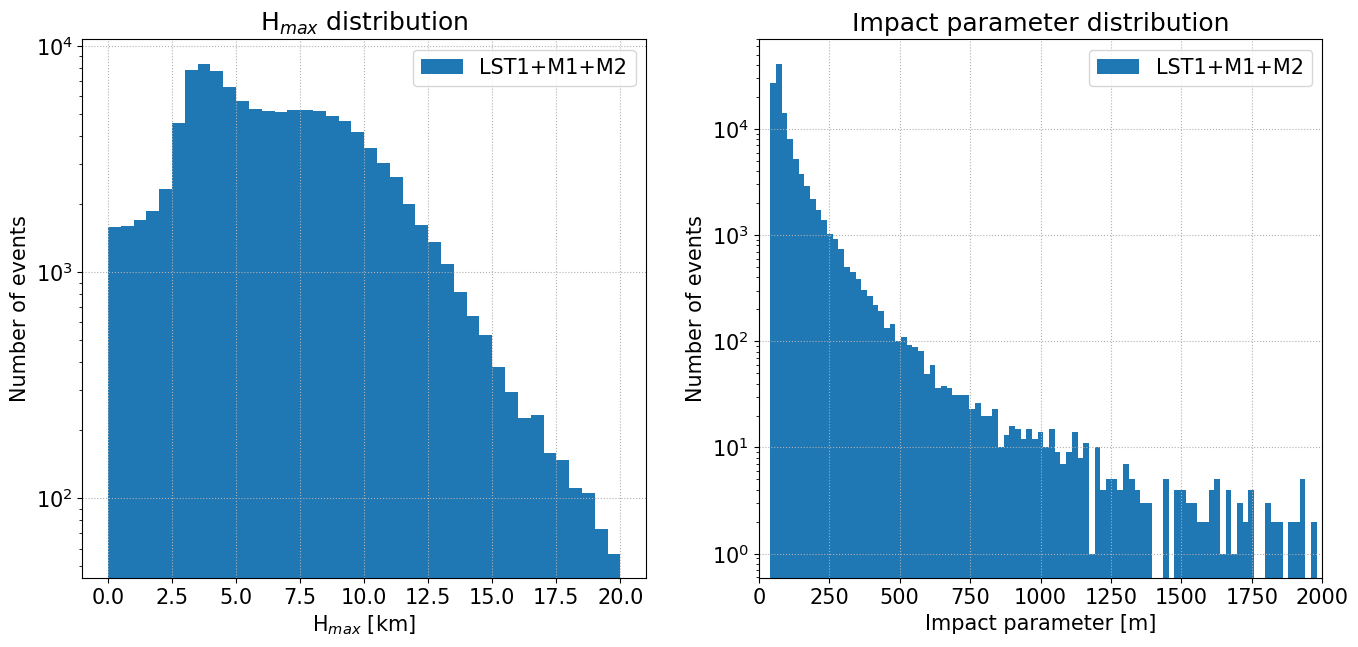

In [25]:
plt.figure(figsize=(16,7))

m2km = 1e-3
plt.subplot(121)
df = data_merged.query(f'multiplicity == 3').groupby(['obs_id', 'event_id']).mean()

plt.hist(
    df['h_max'].to_numpy() * m2km, bins=np.linspace(0, 20, 41), label='LST1+M1+M2'
)
plt.title(f'H$_{{max}}$ distribution')
plt.xlabel(f'H$_{{max}}$ [km]')
plt.ylabel('Number of events')
plt.yscale('log')
plt.legend()
plt.grid()

plt.subplot(122)

df = data_merged.query(f'multiplicity == 3').groupby(['obs_id', 'event_id']).mean()

plt.hist(
    df['impact'].to_numpy(), bins=np.linspace(0, 2000, 100), label='LST1+M1+M2'
)
plt.title(f'Impact parameter distribution')
plt.xlabel('Impact parameter [m]')
plt.ylabel('Number of events')
plt.xlim(0,2000)  
plt.yscale('log')
plt.legend()
plt.grid()

# 6) Check the core position distribution

Extraction of the geometrical position of the telescopes in the simtel array system

In [26]:
geo_info = pd.read_hdf(stereo_merged_file, key='configuration/instrument/subarray/layout')
geo_info

,tel_id,pos_x,pos_y,pos_z,name,type,camera_type,camera_index,optics_index,tel_description
0,1,-8.09,77.13,0.78,LST,LST,LSTCam,0,1,LST_LST_LSTCam
1,2,39.30,-62.55,-0.97,MAGIC,MAGIC,MAGICCam,1,0,MAGIC_MAGIC_MAGICCam
2,3,-31.21,-14.57,0.20,MAGIC,MAGIC,MAGICCam,1,0,MAGIC_MAGIC_MAGICCam


In [27]:
LST1_coords=[geo_info[geo_info.tel_id==1].pos_x,geo_info[geo_info.tel_id==1].pos_y]
MAGIC1_coords=[geo_info[geo_info.tel_id==2].pos_x,geo_info[geo_info.tel_id==2].pos_y]
MAGIC2_coords=[geo_info[geo_info.tel_id==3].pos_x,geo_info[geo_info.tel_id==3].pos_y]

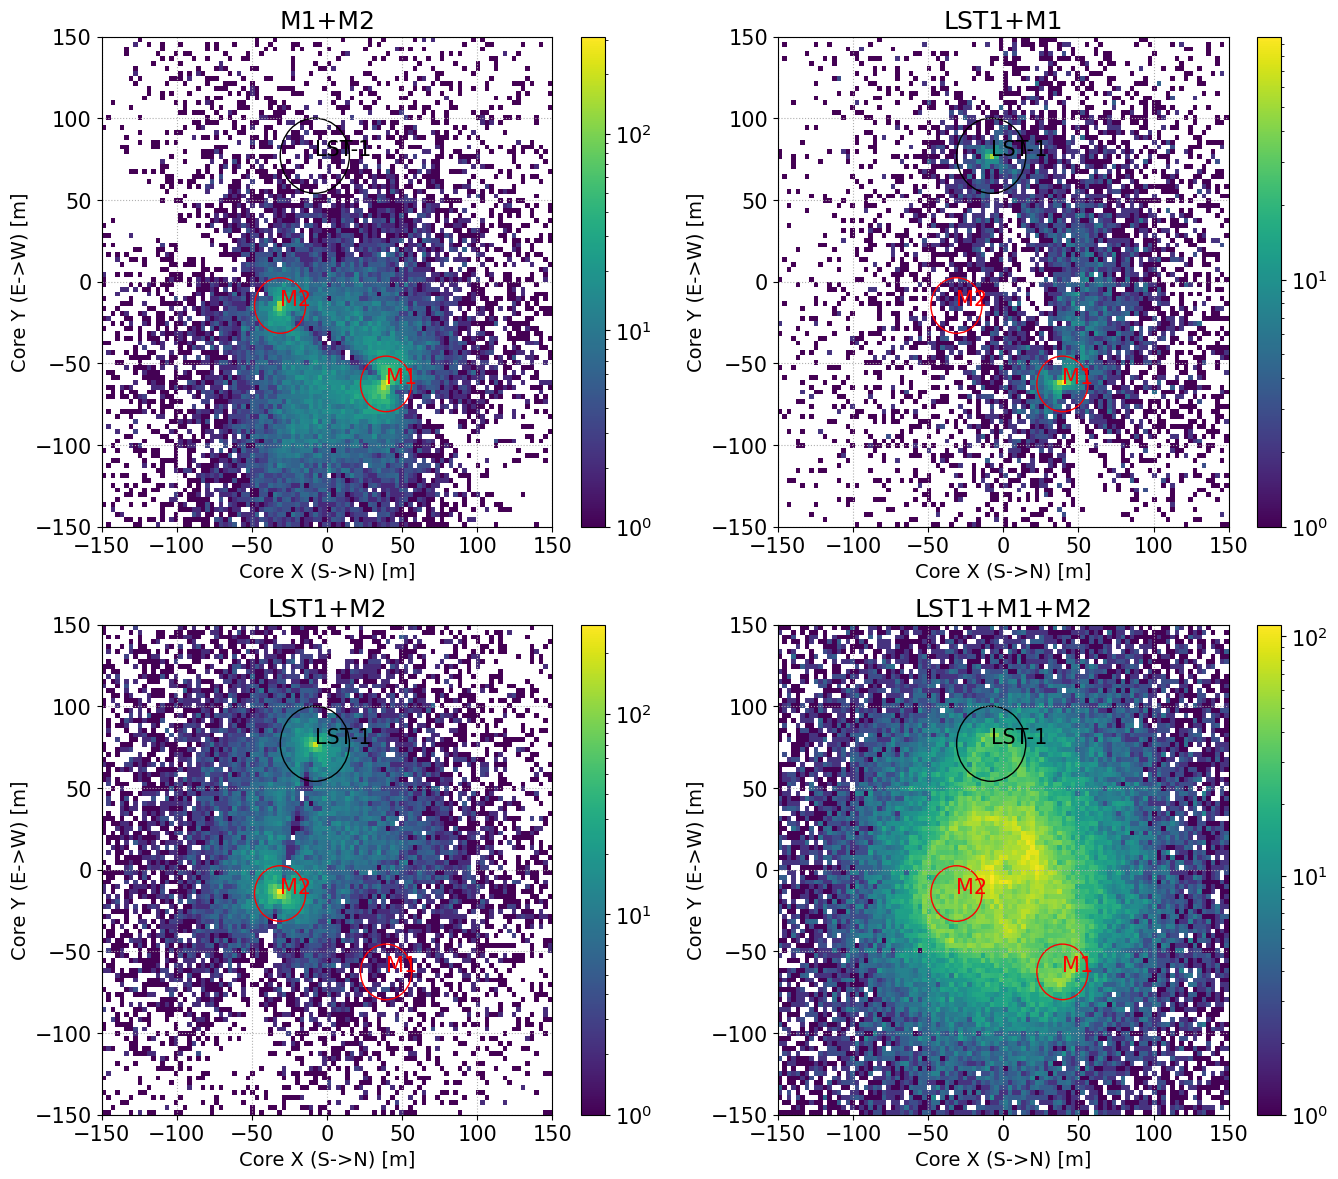

In [28]:
combo_names=['M1+M2','LST1+M1','LST1+M2','LST1+M1+M2']
bins=[100,100]
plt.figure(figsize=(16,14))
plot_range=[-150,150]
for i,combo_name in enumerate(combo_names):
    a=221+i
    plt.subplot(a)
    plt.title(f'{combo_name}')

    ax = plt.gca()
    df = data_merged.query(f'combo_type=={i}').groupby(['obs_id', 'event_id']).mean()

    plt.hist2d(
        df['core_x'].to_numpy(),
        df['core_y'].to_numpy(),
        range=[[plot_range[0],plot_range[1]], [plot_range[0],plot_range[1]]],
        bins=bins,norm='log')



    circle_1=plt.Circle([a for a in MAGIC1_coords],17,color='r', fill=False,label='M1')
    circle_2=plt.Circle([a for a in MAGIC2_coords],17,color='r', fill=False,label='M2')
    circle_L=plt.Circle([a for a in LST1_coords],23,color='black', fill=False,label='LST-1')
    ax.add_patch(circle_1)
    ax.add_patch(circle_2)
    ax.add_patch(circle_L)
    plt.text(MAGIC1_coords[0],MAGIC1_coords[1],s='M1',color='r')
    plt.text(MAGIC2_coords[0],MAGIC2_coords[1],s='M2',color='r')
    plt.text(LST1_coords[0],LST1_coords[1],s='LST-1',color='black')

    plt.xlabel('Core X (S->N) [m]',fontsize=14)
    plt.ylabel('Core Y (E->W) [m]',fontsize=14)
    plt.xlim(plot_range[0],plot_range[1])
    plt.ylim(plot_range[0],plot_range[1])
    plt.colorbar()
    plt.grid()

In [29]:
#!rm -r $output_dir